In [1]:
import matplotlib.pyplot as plt

import numpy as np
from scipy.fft import ifft

from timescales.fit.utils import convert_knee_val
from timescales.sim.psd import sim_lorentzian
from timescales.sim import sim_exp_decay

from timescales.plts import set_default_rc
set_default_rc()

### Timescales

Timescales refer the the time it takes for a process to complete and may be quanitfied using power spectral density or the autocorrelation function. This tutorial descibes the PSD and ACF models used to measure timescales.

#### PSD
In the PSD, timescales are defined as the transition from constant log-log power to linearly decaying log-log power.

In [2]:
# Simulate
knee_freq = 10

freqs = np.linspace(1, 200, 1000)
powers = sim_lorentzian(freqs, knee_freq, constant=1e-4)

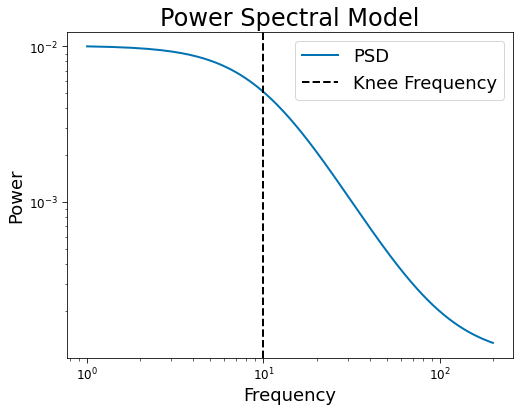

In [3]:
# Plot
plt.figure(figsize=(8, 6))
plt.title('Power Spectral Model')
plt.loglog(freqs, powers, label='PSD')
plt.axvline(knee_freq, color='k', ls='--', label='Knee Frequency')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend();

#### ACF

In the ACF, timescales are defined as the inverse of the exponential decay rate.

In [4]:
# Simulate
fs = 1000
tau = convert_knee_val(knee_freq)

lags = np.linspace(1, 200, 1000)
corrs = sim_exp_decay(lags, fs, tau, 1)

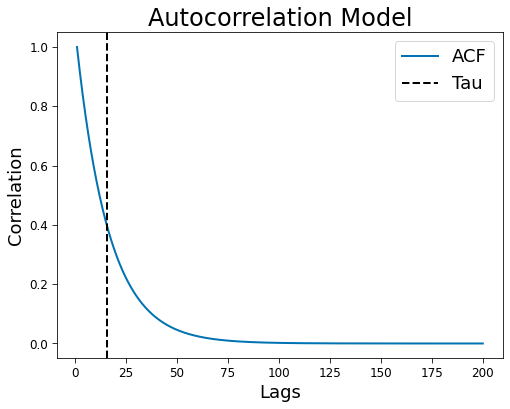

In [5]:
# Plot
plt.figure(figsize=(8, 6))
plt.title('Autocorrelation Model')
plt.plot(lags, corrs, label='ACF')
plt.axvline(tau * fs, color='k', ls='--', label='Tau')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.legend();

#### Wiener–Khinchin Theorem

The Wiener–Khinchin Theorem descibes the relationship between the PSD and ACF uing the (inverse) Fourier transform.